In [ ]:
# Updating the scikit-learn package to the latest version
!pip install scikit-learn --upgrade
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import Data from all Sites with Different Nominal Power

In [ ]:
df_50 = pd.read_excel(r'C:\Users\Farin\Documents\Tilburg_University\00_Thesis_start\DB\s1_50MW.xlsx').drop(index=0)
df_130 = pd.read_excel(r'C:\Users\Farin\Documents\Tilburg_University\00_Thesis_start\DB\s2_130MW.xlsx').drop(index=0)
df_35 = pd.read_excel(r'C:\Users\Farin\Documents\Tilburg_University\00_Thesis_start\DB\s6_35MW.xlsx').drop(index=0)
df_30 = pd.read_excel(r'C:\Users\Farin\Documents\Tilburg_University\00_Thesis_start\DB\s8_30MW.xlsx').drop(index=0)

# Explanatory Data Analysis

Rename Columns,
Replace <NULL> with NaN,
Change Data types,
Remove records with missing values for all features,
Remove records with values such as -99 and --.


In [ ]:
for dataset in [df_50, df_130, df_35, df_30]:
        dataset.columns=['time','TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']

In [ ]:
df_50.replace('<NULL>', 'NaN', inplace=True)
df_130.replace('<NULL>', 'NaN', inplace=True)
df_35.replace('<NULL>', 'NaN', inplace=True)
df_30.replace('<NULL>', 'NaN', inplace=True)

In [ ]:
for dataset in [df_50, df_130, df_35, df_30]:
    for tile in ['TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']:
        dataset[tile]= dataset[tile].astype('float')

In [ ]:
df_50['time'] = pd.to_datetime(df_50['time'], errors='coerce')
df_130['time'] = pd.to_datetime(df_130['time'], errors='coerce')

In [ ]:
df_35.dropna(how='any', inplace=True)# Drop rows where 'TSI' is -99 using the index
df_50 = df_50.drop(df_50[df_50['TSI'] == -99].index)
df_130 = df_130.drop(df_130[df_130['TSI'] == -99].index)

In [ ]:
# Drop rows where 'TSI' is -99 using the index
df_50 = df_50.drop(df_50[df_50['TSI'] == -99].index)
df_130 = df_130.drop(df_130[df_130['TSI'] == -99].index)

# Scatter Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of datasets
datasets = [df_50, df_130, df_30, df_30]  # Assuming you want to display all four datasets
dataset_names = ['df_50', 'df_130', 'df_30', 'df_30']

# Set up the seaborn style for aesthetics
sns.set(style="whitegrid")

# Define the number of rows and columns for the subplot grid
num_rows = 7  # Number of features (rows)
num_columns = 4  # Number of datasets (columns)

# Create a large figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 30))

# Define colors for each dataset (red, blue, green, yellow)
colors = ['red', 'blue', 'green', 'pink']  # Explicit colors for datasets

# Loop through the datasets (columns)
for col_idx, (dataset, dataset_name) in enumerate(zip(datasets, dataset_names)):
    # Get the list of feature columns (assuming all columns except 'Power(MW)' are features)
    features = dataset.columns[dataset.columns != 'Power(MW)']
    
    # Loop through each feature (row)
    for row_idx, feature in enumerate(features):
        ax = axes[row_idx, col_idx]  # Get the correct axis in the grid
        
        # Plot the scatter plot for the feature vs Power(MW) for the current dataset
        sns.scatterplot(x=dataset[feature], y=dataset['Power(MW)'], 
                        ax=ax, color=colors[col_idx], s=80, label=dataset_name)
        
        # Set title and axis labels
        ax.set_title(f'{feature} vs Power(MW)', fontsize=10)
        ax.set_xlabel(feature, fontsize=8)
        ax.set_ylabel('Power(MW)', fontsize=8)
        
        # Adjust font size for axis ticks
        ax.tick_params(axis='both', which='major', labelsize=8)

# Adjust layout to avoid overlap and make it readable
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('scatter_plots_by_dataset2.png', dpi=300)  # Save with 300 dpi for high quality

# Show the plot
plt.show()


# Box Plot for Site_50MW

In [ ]:
import matplotlib.pyplot as plt

# Define the features to plot
feature_names = ['TSI', 'DNI', 'GHI', 'Air_T', 'Air_P', 'Air_H', 'Power(MW)']

# Enhanced Box plots
plt.figure(figsize=(15, 10))

# Create the boxplot with additional styling
boxprops = dict(linestyle='-', linewidth=2, color='navy')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='grey')

# Create the boxplot
boxplot = plt.boxplot([df_50[feature] for feature in feature_names], 
                      labels=feature_names, 
                      notch=True, 
                      patch_artist=True, 
                      boxprops=boxprops, 
                      medianprops=medianprops, 
                      whiskerprops=whiskerprops, 
                      capprops=capprops)

# Adding grid, title and labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
plt.title('Feature Distribution - Boxplot', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save the plot
plt.savefig('Feature_boxplot_50.pdf', dpi=300)
plt.show()


# Box Plot for Site_130MW

In [ ]:
import matplotlib.pyplot as plt

# Define the features to plot
feature_names = ['TSI', 'DNI', 'GHI', 'Air_T', 'Air_P', 'Air_H', 'Power(MW)']

# Enhanced Box plots
plt.figure(figsize=(15, 10))

# Create the boxplot with additional styling
boxprops = dict(linestyle='-', linewidth=2, color='navy')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='grey')

# Create the boxplot
boxplot = plt.boxplot([df_130[feature] for feature in feature_names], 
                      labels=feature_names, 
                      notch=True, 
                      patch_artist=True, 
                      boxprops=boxprops, 
                      medianprops=medianprops, 
                      whiskerprops=whiskerprops, 
                      capprops=capprops)

# Adding grid, title and labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
plt.title('Feature Distribution - Boxplot', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save the plot
plt.savefig('Feature_boxplot_130.pdf', dpi=300)
plt.show()


 # Box Plot for Site_30MW

In [ ]:
import matplotlib.pyplot as plt

# Define the features to plot
feature_names = ['TSI', 'DNI', 'GHI', 'Air_T', 'Air_P', 'Air_H', 'Power(MW)']

# Enhanced Box plots
plt.figure(figsize=(15, 10))

# Create the boxplot with additional styling
boxprops = dict(linestyle='-', linewidth=2, color='navy')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='grey')

# Create the boxplot
boxplot = plt.boxplot([df_30[feature] for feature in feature_names], 
                      labels=feature_names, 
                      notch=True, 
                      patch_artist=True, 
                      boxprops=boxprops, 
                      medianprops=medianprops, 
                      whiskerprops=whiskerprops, 
                      capprops=capprops)

# Adding grid, title and labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
plt.title('Feature Distribution - Boxplot', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save the plot
plt.savefig('Feature_boxplot_30.pdf', dpi=300)
plt.show()


 # Box Plot for Site_35MW

In [ ]:
import matplotlib.pyplot as plt

# Define the features to plot
feature_names = ['TSI', 'DNI', 'GHI', 'Air_T', 'Air_P', 'Air_H', 'Power(MW)']

# Enhanced Box plots
plt.figure(figsize=(15, 10))

# Create the boxplot with additional styling
boxprops = dict(linestyle='-', linewidth=2, color='navy')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='grey')

# Create the boxplot
boxplot = plt.boxplot([df_35[feature] for feature in feature_names], 
                      labels=feature_names, 
                      notch=True, 
                      patch_artist=True, 
                      boxprops=boxprops, 
                      medianprops=medianprops, 
                      whiskerprops=whiskerprops, 
                      capprops=capprops)

# Adding grid, title and labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
plt.title('Feature Distribution - Boxplot', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save the plot
plt.savefig('Feature_boxplot_35.pdf', dpi=300)
plt.show()


# Correlation_heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of DataFrames and their respective titles
dataframes = [df_50, df_130, df_30, df_35]
titles = ['df_50 Correlation Matrix', 'df_130 Correlation Matrix', 'df_30 Correlation Matrix', 'df_35 Correlation Matrix']

# List of features to consider for correlation
features = ['TSI', 'DNI', 'GHI', 'Air_T', 'Air_P', 'Air_H', 'Power(MW)']

# Create subplots for each DataFrame
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (df, title) in enumerate(zip(dataframes, titles)):
    # Calculate the correlation matrix
    correlation_matrix = df[features].corr()

    # Plot the correlation matrix
    cax = axs[i].imshow(correlation_matrix, cmap='coolwarm', vmax=1, vmin=-1)
    axs[i].set_title(title)
    axs[i].set_xticks(range(len(correlation_matrix.columns)))
    axs[i].set_xticklabels(correlation_matrix.columns, rotation=90)
    axs[i].set_yticks(range(len(correlation_matrix.columns)))
    axs[i].set_yticklabels(correlation_matrix.columns)

    # Add color bar
    plt.colorbar(cax, ax=axs[i], fraction=0.046, pad=0.04)

    # Add correlation values in the matrix
    for j in range(len(correlation_matrix.columns)):
        for k in range(len(correlation_matrix.columns)):
            text = axs[i].text(k, j, np.around(correlation_matrix.iloc[j, k], decimals=2),
                               ha="center", va="center", color="w")

# Adjust layout
plt.tight_layout()
plt.savefig('Correlation_heatmap_before.pdf', dpi=300)
plt.show()


# Resamples Data Frames(with Navg=2) for all Sites with Different Nominal Power

In [ ]:
import pandas as pd

# Assuming your data frames are named df_50, df_130, df_35, df_30
dataframes = [df_50, df_130, df_35, df_30]

# Function to resample and average the data frames
def resample_and_average(df):
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    resampled_df = df.resample('30T').mean()
    return resampled_df

# Apply the function to each data frame
resampled_dfs = [resample_and_average(df) for df in dataframes]

# If you want to access each resampled data frame individually
resampled_df_50, resampled_df_130, resampled_df_35, resampled_df_30 = resampled_dfs

# Example: Print the resampled df_50
print(resampled_df_50)

resampled_df_50 = resampled_df_50.fillna(method='ffill')
resampled_df_130 = resampled_df_50.fillna(method='ffill')
resampled_df_35 = resampled_df_50.fillna(method='ffill')
resampled_df_30 = resampled_df_50.fillna(method='ffill')


# Assuming the dataframes are already defined
resampled_df_50.to_csv('resampled_df_50_time.csv', index=True)
resampled_df_130.to_csv('resampled_df_130_time.csv', index=True)
resampled_df_35.to_csv('resampled_df_35_time.csv', index=True)
resampled_df_30.to_csv('resampled_df_30_time.csv', index=True)

print("Dataframes have been successfully exported to CSV files.")

# Spilit Each Resample data for all Sites to Train, Validation and Test

In [ ]:
import pandas as pd

# Function to split the data into train, validation, and test sets
def split_data(df, train_size=0.7, val_size=0.1, test_size=0.2):
    # Ensure the sizes sum to 1
    assert train_size + val_size + test_size == 1, "Train, validation, and test sizes must sum to 1"
    
    # Calculate the number of samples for each set
    n = len(df)
    train_end = int(train_size * n)
    val_end = train_end + int(val_size * n)
    
    # Split the data
    train = df[:train_end]
    val = df[train_end:val_end]
    test = df[val_end:]
    
    return train, val, test

# Assuming your resampled data frames are named resampled_df_50, resampled_df_130, resampled_df_35, resampled_df_30
resampled_dataframes = [resampled_df_50, resampled_df_130, resampled_df_35, resampled_df_30]

# Apply the function to each resampled data frame
split_resampled_dfs = [split_data(df) for df in resampled_dataframes]

# Corrected unpacking of the split data frames
(train_resampled_df_50, val_resampled_df_50, test_resampled_df_50), \
(train_resampled_df_130, val_resampled_df_130, test_resampled_df_130), \
(train_resampled_df_35, val_resampled_df_35, test_resampled_df_35), \
(train_resampled_df_30, val_resampled_df_30, test_resampled_df_30) = split_resampled_dfs

# Example: Print the shapes of the split resampled_df_50
print("Train shape:", train_resampled_df_50.shape)
print("Validation shape:", val_resampled_df_50.shape)
print("Test shape:", test_resampled_df_50.shape)


# Scaling Features

In [ ]:
# Computing mean and normalizing deviation of the training data for df_50
max_train_50 = train_resampled_df_50.max(axis=0)
min_train_50 = train_resampled_df_50.min(axis=0)

# Normalizing training, validation, and test data for df_50
normalized_train_df_50 = (train_resampled_df_50 - min_train_50) / (max_train_50 - min_train_50)
normalized_val_df_50 = (val_resampled_df_50 - min_train_50) / (max_train_50 - min_train_50)
normalized_test_df_50 = (test_resampled_df_50 - min_train_50) / (max_train_50 - min_train_50)

# Computing mean and normalizing deviation of the training data for df_130
max_train_130 = train_resampled_df_130.max(axis=0)
min_train_130 = train_resampled_df_130.min(axis=0)

# Normalizing training, validation, and test data for df_130
normalized_train_df_130 = (train_resampled_df_130 - min_train_130) / (max_train_130 - min_train_130)
normalized_val_df_130 = (val_resampled_df_130 - min_train_130) / (max_train_130 - min_train_130)
normalized_test_df_130 = (test_resampled_df_130 - min_train_130) / (max_train_130 - min_train_130)

# Computing mean and normalizing deviation of the training data for df_30
max_train_30 = train_resampled_df_30.max(axis=0)
min_train_30 = train_resampled_df_30.min(axis=0)

# Normalizing training, validation, and test data for df_30
normalized_train_df_30 = (train_resampled_df_30 - min_train_30) / (max_train_30 - min_train_30)
normalized_val_df_30 = (val_resampled_df_30 - min_train_30) / (max_train_30 - min_train_30)
normalized_test_df_30 = (test_resampled_df_30 - min_train_30) / (max_train_30 - min_train_30)

# Computing mean and normalizing deviation of the training data for df_35
max_train_35 = train_resampled_df_35.max(axis=0)
min_train_35 = train_resampled_df_35.min(axis=0)

# Normalizing training, validation, and test data for df_35
normalized_train_df_35 = (train_resampled_df_35 - min_train_35) / (max_train_35 - min_train_35)
normalized_val_df_35 = (val_resampled_df_35 - min_train_35) / (max_train_35 - min_train_35)
normalized_test_df_35 = (test_resampled_df_35 - min_train_35) / (max_train_35 - min_train_35)


# Random Forest

# Grid Search for Site_50MW on Train and Validatian Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")

# Function to plot the results of Grid Search
def plot_search_results(grid, dataset_name):
    """
    Params: 
        grid: A trained GridSearchCV object.
        dataset_name: A string representing the name of the dataset (e.g., 'Dataset 50').
    """
    # Results from grid search
    results = grid.cv_results_
    means_test = np.sqrt(-results['mean_test_score'])
    stds_test = np.sqrt(results['std_test_score'])
    means_train = np.sqrt(-results['mean_train_score'])
    stds_train = np.sqrt(results['std_train_score'])

    # Getting indexes of values per hyper-parameter
    masks = []
    masks_names = list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_' + p_k].data == p_v))

    params = grid.param_grid

    # Plotting results
    fig, ax = plt.subplots(1, len(params), sharex='none', sharey='all', figsize=(20, 5))
    fig.suptitle(f'Random Forest Hyperparameter Tuning Results ({dataset_name})')
    fig.text(0.04, 0.5, 'MEAN RMSE', va='center', rotation='vertical')
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i + 1:])
        best_params_mask = m.all(axis=0)
        best_index = np.where(best_params_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='Validation')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^', label='Train')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

# Function to train and evaluate the Random Forest model with Grid Search
def train_evaluate_rf_grid_search(train_df, val_df, target_column='Power(MW)', lookback_steps=8, dataset_name='Dataset'):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape X to 2D array for RandomForestRegressor
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_val = X_val.reshape(X_val.shape[0], -1)
    
    # Define the parameter grid for Grid Search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [2, 4, 6],
        'bootstrap': [True, False]
    }
    
    # Initialize the Random Forest model
    rf_model = RandomForestRegressor()
    
    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               cv=3, n_jobs=-1, scoring='neg_mean_squared_error', return_train_score=True)
    
    # Fit the Grid Search model
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters from Grid Search
    best_params = grid_search.best_params_
    print(f"Best parameters from Grid Search for {dataset_name}: {best_params}")
    
    # Train the Random Forest model with the best parameters
    best_rf_model = grid_search.best_estimator_
    
    # Predict on train and validation sets
    y_pred_train = best_rf_model.predict(X_train)
    y_pred_val = best_rf_model.predict(X_val)
    
    # Calculate and print R squared and RMSE
    calculate_metrics(y_train, y_pred_train, y_val, y_pred_val, title=f'Random Forest with Grid Search ({dataset_name})')
    
    # Plot the results of Grid Search
    plot_search_results(grid_search, dataset_name)

# List of split data frames (train_df, val_df) and their corresponding dataset names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Dataset 50')
]

# Loop through each pair of train and validation dataframes
for i, (train_df, val_df, dataset_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating Random Forest model with Grid Search for {dataset_name}")
    train_evaluate_rf_grid_search(train_df=train_df,
                                  val_df=val_df,
                                  target_column='Power(MW)',
                                  lookback_steps=8,
                                  dataset_name=dataset_name)


# Build Random Forest model with best combination of Hyperparameters, then forcast On Test Data for all sites

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE for train and test
def calculate_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test, title):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_test = r2_score(y_true_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Test R squared: {r2_test}, RMSE: {rmse_test}")

# Function to train and evaluate the Random Forest model
def train_evaluate_rf(train_df, test_df, target_column='Power(MW)', lookback_steps=8):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape X to 2D array for RandomForestRegressor
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Train the Random Forest model with specified hyperparameters
    rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, max_depth=20, min_samples_leaf=2)
    rf_model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    # Calculate and print R squared and RMSE for train and test
    calculate_metrics(y_train, y_pred_train, y_test, y_pred_test, title='Random Forest')

# List of split data frames (train and test)
split_resampled_dfs = [
    (normalized_train_df_50, normalized_test_df_50),
    (normalized_train_df_130, normalized_test_df_130),
    (normalized_train_df_35, normalized_test_df_35),
    (normalized_train_df_30, normalized_test_df_30)
]

# Apply the Random Forest model to each set of split data frames and calculate metrics
for i, (train_df, test_df) in enumerate(split_resampled_dfs):
    print(f"Evaluating Random Forest model for resampled dataset {i+1}")
    train_evaluate_rf(train_df=train_df,
                      test_df=test_df,
                      target_column='Power(MW)',
                      lookback_steps=8)


# Feature Importance for All Sites with Different Nominal Power

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    feature_names = df.columns.tolist()
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    
    # Create labels for each feature to indicate time step
    labels = [f"{feature} (t-{lookback_steps+1-j})" for j in range(1, lookback_steps+1) for feature in feature_names]
    return np.array(X), np.array(y), labels

# Function to calculate and print R squared and RMSE for train and test
def calculate_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test, title):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_test = r2_score(y_true_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Test R squared: {r2_test}, RMSE: {rmse_test}")

# Function to train and evaluate the Random Forest model
def train_evaluate_rf(train_df, test_df, target_column='Power(MW)', lookback_steps=8):
    # Create look-back features
    X_train, y_train, feature_labels = create_lookback_features(train_df, target_column, lookback_steps)
    X_test, y_test, _ = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape X to 2D array for RandomForestRegressor
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Train the Random Forest model with specified hyperparameters
    rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, max_depth=20, min_samples_leaf=2)
    rf_model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    # Calculate and print R squared and RMSE for train and test
    calculate_metrics(y_train, y_pred_train, y_test, y_pred_test, title='Random Forest')
    
    # Plot feature importance with actual feature names indicating time step
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    best_indices = indices[:10]  # Select the top 10 features
    
    # Create a color map for different time steps
    cmap = plt.get_cmap('tab20')  # Use a colormap with distinct colors
    num_features_per_step = len(train_df.columns)
    colors = [cmap(i) for i in range(lookback_steps)]
    bar_colors = np.array([colors[j // num_features_per_step] for j in best_indices])
    
    plt.figure(figsize=(20, 8))
    plt.title("Feature Importances - Site_30MV")
    bars = plt.bar(range(len(best_indices)), importances[best_indices], color=bar_colors)
    
    # Add a legend to indicate time steps
    handles = [plt.Rectangle((0, 0), 1, 1, color=cmap(i)) for i in range(lookback_steps)]
    labels = [f't-{lookback_steps+1-j}' for j in range(lookback_steps)]
    plt.legend(handles, labels)
    
    plt.xticks(range(len(best_indices)), [feature_labels[i] for i in best_indices], rotation=90)
    plt.xlim([-1, len(best_indices)])

    # Adjust layout and save the plot as PNG
    plt.tight_layout()  # Fit the plot to avoid overlap
    plt.savefig('feature_importance_plot.png')  # Save the plot as PNG
    plt.show()  # Show the plot

# List of split data frames (train and test)
split_resampled_dfs = [
    (normalized_train_df_30, normalized_test_df_50),
    (normalized_train_df_30, normalized_test_df_130),
    (normalized_train_df_30, normalized_test_df_30),
    (normalized_train_df_30, normalized_test_df_35)
]

# Apply the Random Forest model to each set of split data frames and calculate metrics
for i, (train_df, test_df) in enumerate(split_resampled_dfs):
    print(f"Evaluating Random Forest model for resampled dataset {i+1}")
    train_evaluate_rf(train_df, test_df, target_column='Power(MW)', lookback_steps=8)


# Residual Plot for Actual And Predicted For All Sites

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    feature_names = df.columns.tolist()
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    
    # Create labels for each feature to indicate time step
    labels = [f"{feature} (t-{lookback_steps+1-j})" for j in range(1, lookback_steps+1) for feature in feature_names]
    return np.array(X), np.array(y), labels

# Function to calculate and print R squared and RMSE for train and test
def calculate_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test, title):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_test = r2_score(y_true_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Test R squared: {r2_test}, RMSE: {rmse_test}")

# Function to train and evaluate the Random Forest model
def train_evaluate_rf(train_df, test_df, target_column='Power(MW)', lookback_steps=8):
    # Create look-back features
    X_train, y_train, feature_labels = create_lookback_features(train_df, target_column, lookback_steps)
    X_test, y_test, _ = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape X to 2D array for RandomForestRegressor
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Train the Random Forest model with specified hyperparameters
    rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, max_depth=20, min_samples_leaf=2)
    rf_model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    # Calculate and print R squared and RMSE for train and test
    calculate_metrics(y_train, y_pred_train, y_test, y_pred_test, title='Random Forest')
    
    # Plot feature importance with actual feature names indicating time step
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Create a color map for different time steps
    cmap = plt.get_cmap('tab20')  # Use a colormap with distinct colors
    num_features_per_step = len(train_df.columns)
    colors = [cmap(i) for i in range(lookback_steps)]
    bar_colors = np.array([colors[j // num_features_per_step] for j in indices])
    
 
    
    # Plot Actual vs Predicted on Test Data
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_test, alpha=0.5, color='b', label='Test Data')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted on Test Data - Site_50MV')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Apply the Random Forest model to each set of split data frames and calculate metrics
split_resampled_data = [
    (normalized_train_df_50, normalized_test_df_50),
    (normalized_train_df_130, normalized_test_df_130),
    (normalized_train_df_35, normalized_test_df_35),
    (normalized_train_df_30, normalized_test_df_30)
]


for i, (train_df, test_df) in enumerate(split_resampled_data):
    print(f"Evaluating Random Forest model for resampled dataset {i+1}")
    train_evaluate_rf(train_df, test_df, target_column='Power(MW)', lookback_steps=8)


# LSTM

# Evaluating LSTM on Validation set without Batch Normalization for site_50MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_lstm(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'LSTM Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


# Evaluating LSTM on Validation set with Batch Normalization for site_50MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_lstm(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'LSTM Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


 # Evaluating LSTM on Validation for site_50MW

Consider different combination of number of units and epochs

Number of Units: 64-32-24, Epochs=128

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_lstm(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'LSTM Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch (LSTM: LB=8, Epoch=64, Units=64-32-24) - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch (LSTM: LB=8, Epoch=64, Units=64-32-24) - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=64,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


Number of Units: 32-16-20, Epochs=128

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_lstm(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=16, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'LSTM Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch (LSTM: LB=8, Epoch=128, Units=32-16-20) - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch (LSTM: LB=8, Epoch=128, Units=32-16-20) - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


Number of Units: 64-32-24, Epochs=64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_lstm(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'LSTM Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch (LSTM: LB=8, Epoch=64, Units=64-32-24) - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch (LSTM: LB=8, Epoch=64, Units=64-32-24) - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=64,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


Number of Units: 32-16-20, Epochs=64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_lstm(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=16, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'LSTM Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch (LSTM: LB=8, Epoch=128, Units=32-16-20) - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch (LSTM: LB=8, Epoch=128, Units=32-16-20) - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=64,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


# Build LSTM model with best combination of Hyperparameters, then forcast On Test Data for all sites and plot actual vs predicted


# Site_50MW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the LSTM model and predict on test data
def train_evaluate_lstm(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for LSTM
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'LSTM Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 90th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 100th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 100th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (LSTM: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_test_df_50, 'Site_50MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_50,
                        max_val=max_train_50)


NameError: name 'normalized_train_df_50' is not defined

# Site_130MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the LSTM model and predict on test data
def train_evaluate_lstm(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for LSTM
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'LSTM Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 90th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 100th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 100th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (LSTM: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_130 = normalized_train_df_130.min().min()  # Get the minimum value from the training data
max_train_130 = normalized_train_df_130.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_130, normalized_test_df_130, 'Site_130MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_130,
                        max_val=max_train_130)


# Site_30MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the LSTM model and predict on test data
def train_evaluate_lstm(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for LSTM
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'LSTM Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 90th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 100th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 100th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (LSTM: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_30 = normalized_train_df_30.min().min()  # Get the minimum value from the training data
max_train_30 = normalized_train_df_30.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_30, normalized_test_df_30, 'Site_30MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_30,
                        max_val=max_train_30)


# Site_35MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the LSTM model and predict on test data
def train_evaluate_lstm(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for LSTM
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'LSTM Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 90th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 100th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 100th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (LSTM: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_35 = normalized_train_df_35.min().min()  # Get the minimum value from the training data
max_train_35 = normalized_train_df_35.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_35, normalized_test_df_35, 'Site_35MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating LSTM model for resampled dataset {site_name} ({i+1})")
    train_evaluate_lstm(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_35,
                        max_val=max_train_35)


# GRU

# Evaluating GRU on Validation set without Batch Normalization for site_50MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
np.random.seed(42)
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_gru(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64,
                       site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'GRU Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


# Evaluating GRU on Validation set with Batch Normalization for site_50MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
np.random.seed(42)
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_gru(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'GRU Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


# Evaluating GRU on Validation for site_50MW

Consider different combination of number of units and epochs

Number of Units: 64-32-24, Epochs=128

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
np.random.seed(42)
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_gru(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'GRU Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


Number of Units: 64-32-24, Epochs=64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
np.random.seed(42)
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_gru(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'GRU Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=64,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


Number of Units: 32-16-20, Epochs=128

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
np.random.seed(42)
# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_gru(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=16, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'GRU Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=128,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


Number of Units: 32-16-20, Epochs=64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
# Set the random seeds for reproducibility
np.random.seed(42)  # For numpy

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to train and evaluate the LSTM model
def train_evaluate_gru(train_df, val_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_train=None, max_train=None):
    # Create look-back features
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    X_val, y_val = create_lookback_features(val_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=16, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Initialize lists to store metrics for each epoch
    r2_train_list = []
    rmse_train_list = []
    r2_val_list = []  # List to store R² for validation set
    rmse_val_list = []  # List to store RMSE for validation set
    
    # Initialize variables to track the best epoch
    best_epoch_r2 = -np.inf
    best_epoch_rmse = np.inf
    best_epoch_r2_index = None
    best_epoch_rmse_index = None
    
    # Train the model and track history
    for epoch in range(epochs):
        # Train for one epoch
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        # Get predictions for train and validation data
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R-squared and RMSE for the current epoch for both train and validation data
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        # Append metrics to lists
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)  # Append to validation list
        rmse_val_list.append(rmse_val)  # Append to validation list
        
        # Track best epoch for R² (max)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        # Track best epoch for RMSE (min)
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    # Predict on the training and validation sets after training
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Reverse normalization for both predictions and true values
    y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
    y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
    y_train_orig = reverse_normalization(y_train, min_train, max_train)
    y_val_orig = reverse_normalization(y_val, min_train, max_train)
    
    # Calculate and print final R squared and RMSE for train and validation sets
    calculate_metrics(y_train_orig, y_pred_train, y_val_orig, y_pred_val, title=f'GRU Model - {site_name}', best_epoch=best_epoch_r2_index)
    
    # Plot the loss, R squared, and RMSE metrics for train and validation sets
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R2 for train and validation sets
    axs[0].plot(range(epochs), r2_train_list, label='Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_list, label='Validation R²', color='green', linestyle='--', marker='s')
    axs[0].set_title(f'R² Score per Epoch - {site_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend()
    
    # Mark best epoch for R² and display R² value
    axs[0].scatter(best_epoch_r2_index, best_epoch_r2, color='red', zorder=5, label=f'Best Epoch: {best_epoch_r2_index}')
    axs[0].text(best_epoch_r2_index, best_epoch_r2, f' R²: {best_epoch_r2:.3f}', color='red', fontsize=10, verticalalignment='bottom')
    
    # Plot RMSE for train and validation sets
    axs[1].plot(range(epochs), rmse_train_list, label='Train RMSE', color='red', linestyle='-', marker='x')
    axs[1].plot(range(epochs), rmse_val_list, label='Validation RMSE', color='purple', linestyle='--', marker='v')
    axs[1].set_title(f'RMSE per Epoch - {site_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend()
    
    # Mark best epoch for RMSE and display RMSE value
    axs[1].scatter(best_epoch_rmse_index, best_epoch_rmse, color='blue', zorder=5, label=f'Best Epoch: {best_epoch_rmse_index}')
    axs[1].text(best_epoch_rmse_index, best_epoch_rmse, f' RMSE: {best_epoch_rmse:.3f}', color='blue', fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, val_resampled_df_50)
# (train_resampled_df_130, val_resampled_df_130)
# (train_resampled_df_35, val_resampled_df_35)
# (train_resampled_df_30, val_resampled_df_30)

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_val_df_50, 'Site_50MV')
]

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# Apply the LSTM model to each set of split data frames and calculate metrics
for i, (train_df, val_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(
        train_df=train_df,
        val_df=val_df,
        target_column='Power(MW)',
        lookback_steps=8,
        epochs=64,
        batch_size=64,
        site_name=site_name,
        min_train=min_train_50,  # Provide the min value for reversing normalization
        max_train=max_train_50   # Provide the max value for reversing normalization
    )


# Build GRU model with best combination of Hyperparameters, then forcast On Test Data for all sites and plot actual vs predicted# 

# Site_50MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the GRU model and predict on test data
def train_evaluate_gru(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for GRU
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'GRU Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 95th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 95th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 95th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (GRU: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_50 = normalized_train_df_50.min().min()  # Get the minimum value from the training data
max_train_50 = normalized_train_df_50.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_50, normalized_test_df_50, 'Site_50MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_50,
                        max_val=max_train_50)


# Site_130MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the GRU model and predict on test data
def train_evaluate_gru(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for GRU
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'GRU Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 95th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 95th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 95th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (GRU: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_130 = normalized_train_df_130.min().min()  # Get the minimum value from the training data
max_train_130 = normalized_train_df_130.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_130, normalized_test_df_130, 'Site_130MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_130,
                        max_val=max_train_130)


# Site_30MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the GRU model and predict on test data
def train_evaluate_gru(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for GRU
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'GRU Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 95th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 95th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 95th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (GRU: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_30 = normalized_train_df_30.min().min()  # Get the minimum value from the training data
max_train_30 = normalized_train_df_30.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_30, normalized_test_df_30, 'Site_30MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_30,
                        max_val=max_train_30)


# Site_35MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)
        y.append(df.iloc[i + lookback_steps][target_column])
    return np.array(X), np.array(y)

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{title} - R squared: {r2}, RMSE: {rmse}")

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to train the GRU model and predict on test data
def train_evaluate_gru(train_df, test_df, target_column='Power(MW)', lookback_steps=8, epochs=100, batch_size=64, site_name='Site', min_val=None, max_val=None):
    # Create look-back features for training data
    X_train, y_train = create_lookback_features(train_df, target_column, lookback_steps)
    
    # Reshape data for GRU: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after first GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    # Adding Dense layers with ReLU activation
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Hidden Dense layer with ReLU
    model.add(BatchNormalization())  # BatchNormalization after Dense layer
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer with Linear activation (default for regression)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
    
    # Create look-back features for test data
    X_test, y_test = create_lookback_features(test_df, target_column, lookback_steps)
    
    # Reshape test data for GRU
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    
    # Predict on the test data
    y_pred_test = model.predict(X_test)
    
    # Reverse normalization on both actual and predicted values
    y_test_reversed = reverse_normalization(y_test, min_val, max_val)
    y_pred_test_reversed = reverse_normalization(y_pred_test, min_val, max_val)
    
    # Calculate and print R squared and RMSE for the test set
    calculate_metrics(y_test_reversed, y_pred_test_reversed, title=f'GRU Model - {site_name} (Test Data)')

    # Define the range of days you want to plot (90th to 100th days)
    start_day = 90
    end_day = 95
    records_per_day = 48  # 24 hours * 2 records per hour (30-minute intervals)

    # Calculate the indices corresponding to the 90th and 100th days
    start_index = (start_day - 1) * records_per_day  # Start index for 95th day
    end_index = end_day * records_per_day  # End index for 100th day

    # Slice the test data and predictions for the range from the 90th to 95th day
    y_test_range = y_test_reversed[start_index:end_index]
    y_pred_test_range = y_pred_test_reversed[start_index:end_index]

    # Plot the comparison between actual and predicted values for the 90th to 95th days
    plt.figure(figsize=(10, 6))
    plt.plot(range(start_index, end_index), y_test_range, label='Actual', color='blue', linestyle='-', marker='o')
    plt.plot(range(start_index, end_index), y_pred_test_range, label='Predicted', color='red', linestyle='--', marker='x')
    plt.title(f'Actual vs Predicted Power (GRU: LB=8, Epoch=128, Unit=64-32-24) - {site_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your split data frames are named as follows:
# (train_resampled_df_50, test_resampled_df_50)

# Define the min and max values used for normalization
min_train_35 = normalized_train_df_35.min().min()  # Get the minimum value from the training data
max_train_35 = normalized_train_df_35.max().max()  # Get the maximum value from the training data

# List of split data frames and site names
split_resampled_dfs = [
    (normalized_train_df_35, normalized_test_df_35, 'Site_35MV')
]

# Apply the GRU model to each set of split data frames and calculate metrics
for i, (train_df, test_df, site_name) in enumerate(split_resampled_dfs):
    print(f"Evaluating GRU model for resampled dataset {site_name} ({i+1})")
    train_evaluate_gru(train_df=train_df,
                        test_df=test_df,
                        target_column='Power(MW)',
                        lookback_steps=8, epochs=128, batch_size=64,
                        site_name=site_name,
                        min_val=min_train_35,
                        max_val=max_train_35)


# LSTM Vs GRU On Test Data

# Site_50MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)  # Slice features
        y.append(df.iloc[i + lookback_steps][target_column])  # Target is the next value
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to build and train LSTM model
def build_train_lstm(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to build and train GRU model
def build_train_gru(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                  kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to plot metrics for both LSTM and GRU models with different reds for RMSE
def plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, 
                 r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, 
                 best_epoch_r2_lstm, best_epoch_rmse_lstm,
                 best_epoch_r2_gru, best_epoch_rmse_gru, epochs):
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R² for train and validation sets (keeping previous colors)
    axs[0].plot(range(epochs), r2_train_lstm, label='LSTM Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_lstm, label='LSTM Test R²', color='blue', linestyle='--')
    axs[0].plot(range(epochs), r2_train_gru, label='GRU Train R²', color='green', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_gru, label='GRU Test R²', color='green', linestyle='--')
    axs[0].set_title('R² for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_50MV')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)
    
    # Plot RMSE for train and validation sets with different red and orange shades
    axs[1].plot(range(epochs), rmse_train_lstm, label='LSTM Train RMSE', color='darkorange', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_lstm, label='LSTM Test RMSE', color='orangered', linestyle='--')
    axs[1].plot(range(epochs), rmse_train_gru, label='GRU Train RMSE', color='darkred', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_gru, label='GRU Test RMSE', color='firebrick', linestyle='--')
    axs[1].set_title('RMSE for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_50MV')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend(loc='upper right')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()



# Example usage:
# Load your training and validation data (assuming they are already normalized and available)
# Train and validate LSTM model
lookback_steps = 8
epochs = 128
batch_size = 64

train_df = normalized_train_df_50 # This is the training DataFrame
val_df = normalized_test_df_50 
X_train, y_train = create_lookback_features(train_df, 'Power(MW)', lookback_steps)
X_val, y_val = create_lookback_features(val_df, 'Power(MW)', lookback_steps)

# Normalize features and target for LSTM/GRU
min_train, max_train = np.min(y_train), np.max(y_train)
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_val = (X_val - X_val.min(axis=0)) / (X_val.max(axis=0) - X_val.min(axis=0))

# Train LSTM
r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, best_epoch_r2_lstm, best_epoch_rmse_lstm = build_train_lstm(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Train GRU
r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, best_epoch_r2_gru, best_epoch_rmse_gru = build_train_gru(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Plot metrics for both models
plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm,
             r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru,
             best_epoch_r2_lstm, best_epoch_rmse_lstm,
             best_epoch_r2_gru, best_epoch_rmse_gru, epochs)


# Site_130MW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)  # Slice features
        y.append(df.iloc[i + lookback_steps][target_column])  # Target is the next value
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to build and train LSTM model
def build_train_lstm(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to build and train GRU model
def build_train_gru(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                  kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to plot metrics for both LSTM and GRU models with different reds for RMSE
def plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, 
                 r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, 
                 best_epoch_r2_lstm, best_epoch_rmse_lstm,
                 best_epoch_r2_gru, best_epoch_rmse_gru, epochs):
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R² for train and validation sets (keeping previous colors)
    axs[0].plot(range(epochs), r2_train_lstm, label='LSTM Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_lstm, label='LSTM Test R²', color='blue', linestyle='--')
    axs[0].plot(range(epochs), r2_train_gru, label='GRU Train R²', color='green', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_gru, label='GRU Test R²', color='green', linestyle='--')
    axs[0].set_title('R² for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_130MV')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)
    
    # Plot RMSE for train and validation sets with different red and orange shades
    axs[1].plot(range(epochs), rmse_train_lstm, label='LSTM Train RMSE', color='darkorange', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_lstm, label='LSTM Test RMSE', color='orangered', linestyle='--')
    axs[1].plot(range(epochs), rmse_train_gru, label='GRU Train RMSE', color='darkred', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_gru, label='GRU Test RMSE', color='firebrick', linestyle='--')
    axs[1].set_title('RMSE for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_130MV')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend(loc='upper right')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()



# Example usage:
# Load your training and validation data (assuming they are already normalized and available)
# Train and validate LSTM model
lookback_steps = 8
epochs = 128
batch_size = 64

train_df = normalized_train_df_130 # This is the training DataFrame
val_df = normalized_test_df_130 
X_train, y_train = create_lookback_features(train_df, 'Power(MW)', lookback_steps)
X_val, y_val = create_lookback_features(val_df, 'Power(MW)', lookback_steps)

# Normalize features and target for LSTM/GRU
min_train, max_train = np.min(y_train), np.max(y_train)
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_val = (X_val - X_val.min(axis=0)) / (X_val.max(axis=0) - X_val.min(axis=0))

# Train LSTM
r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, best_epoch_r2_lstm, best_epoch_rmse_lstm = build_train_lstm(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Train GRU
r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, best_epoch_r2_gru, best_epoch_rmse_gru = build_train_gru(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Plot metrics for both models
plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm,
             r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru,
             best_epoch_r2_lstm, best_epoch_rmse_lstm,
             best_epoch_r2_gru, best_epoch_rmse_gru, epochs)


# Site_30MW

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)  # Slice features
        y.append(df.iloc[i + lookback_steps][target_column])  # Target is the next value
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to build and train LSTM model
def build_train_lstm(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to build and train GRU model
def build_train_gru(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                  kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to plot metrics for both LSTM and GRU models with different reds for RMSE
def plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, 
                 r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, 
                 best_epoch_r2_lstm, best_epoch_rmse_lstm,
                 best_epoch_r2_gru, best_epoch_rmse_gru, epochs):
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R² for train and validation sets (keeping previous colors)
    axs[0].plot(range(epochs), r2_train_lstm, label='LSTM Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_lstm, label='LSTM Test R²', color='blue', linestyle='--')
    axs[0].plot(range(epochs), r2_train_gru, label='GRU Train R²', color='green', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_gru, label='GRU Test R²', color='green', linestyle='--')
    axs[0].set_title('R² for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_30MV')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)
    
    # Plot RMSE for train and validation sets with different red and orange shades
    axs[1].plot(range(epochs), rmse_train_lstm, label='LSTM Train RMSE', color='darkorange', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_lstm, label='LSTM Test RMSE', color='orangered', linestyle='--')
    axs[1].plot(range(epochs), rmse_train_gru, label='GRU Train RMSE', color='darkred', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_gru, label='GRU Test RMSE', color='firebrick', linestyle='--')
    axs[1].set_title('RMSE for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_30MV')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend(loc='upper right')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()



# Example usage:
# Load your training and validation data (assuming they are already normalized and available)
# Train and validate LSTM model
lookback_steps = 8
epochs = 128
batch_size = 64

train_df = normalized_train_df_30 # This is the training DataFrame
val_df = normalized_test_df_30 
X_train, y_train = create_lookback_features(train_df, 'Power(MW)', lookback_steps)
X_val, y_val = create_lookback_features(val_df, 'Power(MW)', lookback_steps)

# Normalize features and target for LSTM/GRU
min_train, max_train = np.min(y_train), np.max(y_train)
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_val = (X_val - X_val.min(axis=0)) / (X_val.max(axis=0) - X_val.min(axis=0))

# Train LSTM
r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, best_epoch_r2_lstm, best_epoch_rmse_lstm = build_train_lstm(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Train GRU
r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, best_epoch_r2_gru, best_epoch_rmse_gru = build_train_gru(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Plot metrics for both models
plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm,
             r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru,
             best_epoch_r2_lstm, best_epoch_rmse_lstm,
             best_epoch_r2_gru, best_epoch_rmse_gru, epochs)


# Site_35MW

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Function to create look-back features for time series forecasting
def create_lookback_features(df, target_column, lookback_steps):
    X, y = [], []
    for i in range(len(df) - lookback_steps):
        X.append(df.iloc[i:i + lookback_steps].values)  # Slice features
        y.append(df.iloc[i + lookback_steps][target_column])  # Target is the next value
    return np.array(X), np.array(y)

# Function to reverse normalization
def reverse_normalization(normalized_values, min_val, max_val):
    return normalized_values * (max_val - min_val) + min_val

# Function to calculate and print R squared and RMSE
def calculate_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val, title, best_epoch=None):
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    
    r2_val = r2_score(y_true_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
    
    print(f"{title} - Train R squared: {r2_train}, RMSE: {rmse_train}")
    print(f"{title} - Validation R squared: {r2_val}, RMSE: {rmse_val}")
    
    if best_epoch is not None:
        print(f"Best Epoch: {best_epoch}")

# Function to build and train LSTM model
def build_train_lstm(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(0.001)))  # LSTM Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second LSTM Layer
    model.add(BatchNormalization())  # BatchNormalization after second LSTM
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to build and train GRU model
def build_train_gru(X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train):
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
                  kernel_regularizer=regularizers.l2(0.001)))  # GRU Layer with L2 regularization
    model.add(BatchNormalization())  # BatchNormalization after GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(GRU(units=32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))  # Second GRU Layer
    model.add(BatchNormalization())  # BatchNormalization after second GRU
    model.add(Dropout(0.2))  # Dropout Layer
    
    model.add(Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense layer with ReLU
    model.add(Dropout(0.2))  # Dropout layer after Dense layer
    
    model.add(Dense(1, activation='linear'))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    r2_train_list, rmse_train_list, r2_val_list, rmse_val_list = [], [], [], []
    best_epoch_r2, best_epoch_rmse = -np.inf, np.inf
    best_epoch_r2_index, best_epoch_rmse_index = None, None
    
    for epoch in range(epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0,shuffle=False)
        
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        
        # Reverse normalization for both predictions and true values
        y_pred_train = reverse_normalization(y_pred_train, min_train, max_train)
        y_pred_val = reverse_normalization(y_pred_val, min_train, max_train)
        y_train_orig = reverse_normalization(y_train, min_train, max_train)
        y_val_orig = reverse_normalization(y_val, min_train, max_train)
        
        # Calculate R² and RMSE
        r2_train = r2_score(y_train_orig, y_pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
        
        r2_val = r2_score(y_val_orig, y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_pred_val))
        
        r2_train_list.append(r2_train)
        rmse_train_list.append(rmse_train)
        r2_val_list.append(r2_val)
        rmse_val_list.append(rmse_val)
        
        # Track best epoch for R² (max) and RMSE (min)
        if r2_val > best_epoch_r2:
            best_epoch_r2 = r2_val
            best_epoch_r2_index = epoch
        
        if rmse_val < best_epoch_rmse:
            best_epoch_rmse = rmse_val
            best_epoch_rmse_index = epoch
    
    return r2_train_list, rmse_train_list, r2_val_list, rmse_val_list, best_epoch_r2_index, best_epoch_rmse_index

# Function to plot metrics for both LSTM and GRU models with different reds for RMSE
def plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, 
                 r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, 
                 best_epoch_r2_lstm, best_epoch_rmse_lstm,
                 best_epoch_r2_gru, best_epoch_rmse_gru, epochs):
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot R² for train and validation sets (keeping previous colors)
    axs[0].plot(range(epochs), r2_train_lstm, label='LSTM Train R²', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_lstm, label='LSTM Test R²', color='blue', linestyle='--')
    axs[0].plot(range(epochs), r2_train_gru, label='GRU Train R²', color='green', linestyle='-', marker='o')
    axs[0].plot(range(epochs), r2_val_gru, label='GRU Test R²', color='green', linestyle='--')
    axs[0].set_title('R² for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_35MV')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('R²')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)
    
    # Plot RMSE for train and validation sets with different red and orange shades
    axs[1].plot(range(epochs), rmse_train_lstm, label='LSTM Train RMSE', color='darkorange', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_lstm, label='LSTM Test RMSE', color='orangered', linestyle='--')
    axs[1].plot(range(epochs), rmse_train_gru, label='GRU Train RMSE', color='darkred', linestyle='-', marker='o')
    axs[1].plot(range(epochs), rmse_val_gru, label='GRU Test RMSE', color='firebrick', linestyle='--')
    axs[1].set_title('RMSE for LSTM and GRU Models (LB=8, Epochs=128, Units=64-32-24) - Site_35MV')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('RMSE')
    axs[1].legend(loc='upper right')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()



# Example usage:
# Load your training and validation data (assuming they are already normalized and available)
# Train and validate LSTM model
lookback_steps = 8
epochs = 128
batch_size = 64

train_df = normalized_train_df_35 # This is the training DataFrame
val_df = normalized_test_df_35 
X_train, y_train = create_lookback_features(train_df, 'Power(MW)', lookback_steps)
X_val, y_val = create_lookback_features(val_df, 'Power(MW)', lookback_steps)

# Normalize features and target for LSTM/GRU
min_train, max_train = np.min(y_train), np.max(y_train)
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_val = (X_val - X_val.min(axis=0)) / (X_val.max(axis=0) - X_val.min(axis=0))

# Train LSTM
r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm, best_epoch_r2_lstm, best_epoch_rmse_lstm = build_train_lstm(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Train GRU
r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru, best_epoch_r2_gru, best_epoch_rmse_gru = build_train_gru(
    X_train, y_train, X_val, y_val, lookback_steps, epochs, batch_size, min_train, max_train
)

# Plot metrics for both models
plot_metrics(r2_train_lstm, rmse_train_lstm, r2_val_lstm, rmse_val_lstm,
             r2_train_gru, rmse_train_gru, r2_val_gru, rmse_val_gru,
             best_epoch_r2_lstm, best_epoch_rmse_lstm,
             best_epoch_r2_gru, best_epoch_rmse_gru, epochs)


# Plot R2 for Different Sites In Different Models

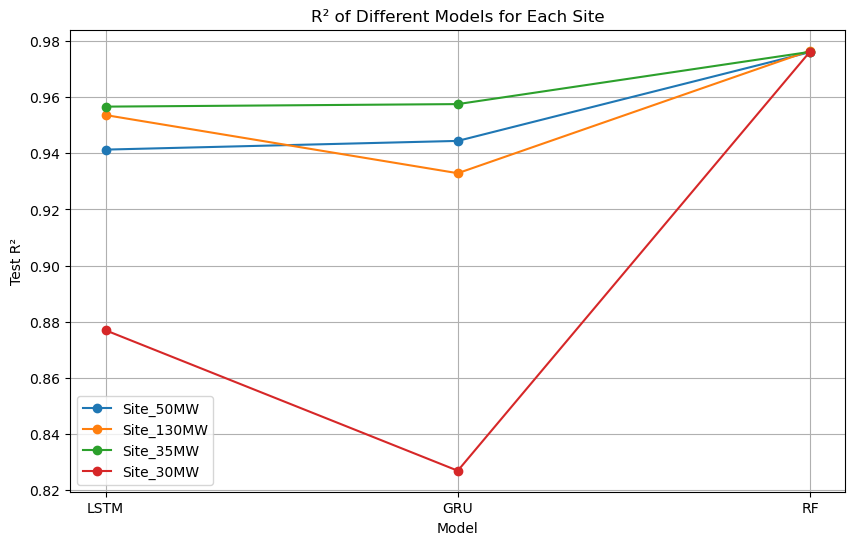

In [3]:
import matplotlib.pyplot as plt

# Data from the table
methods = ['LSTM', 'GRU', 'RF']
site_50mv_r2 = [0.9413, 0.9444, 0.9760]
site_130mv_r2 = [0.9536, 0.9329, 0.9765]
site_35mv_r2 = [0.9566, 0.9575, 0.9761]
site_30mv_r2 = [0.8770, 0.8270, 0.9762]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(methods, site_50mv_r2, marker='o', label='Site_50MW')
plt.plot(methods, site_130mv_r2, marker='o', label='Site_130MW')
plt.plot(methods, site_35mv_r2, marker='o', label='Site_35MW')
plt.plot(methods, site_30mv_r2, marker='o', label='Site_30MW')

# Adding titles and labels
plt.title('R² of Different Models for Each Site')
plt.xlabel('Model')
plt.ylabel('Test R²')
plt.legend()

# Save the plot as an image file
plt.grid(True)
plt.savefig('r2_plot.png')

# Display the plot
plt.show()
